In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [2]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


windspeed           0.343700
rainfall6           0.901206
rainfallaverage     1.000000
area                0.041834
yield               0.065524
distance            0.125570
areayieldrataio     0.035082
percentageofarea    0.094566
darea               0.074848
yielda              0.098306
fgprice            -0.137751
dctrice             0.078049
Name: rainfall24, dtype: float64


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


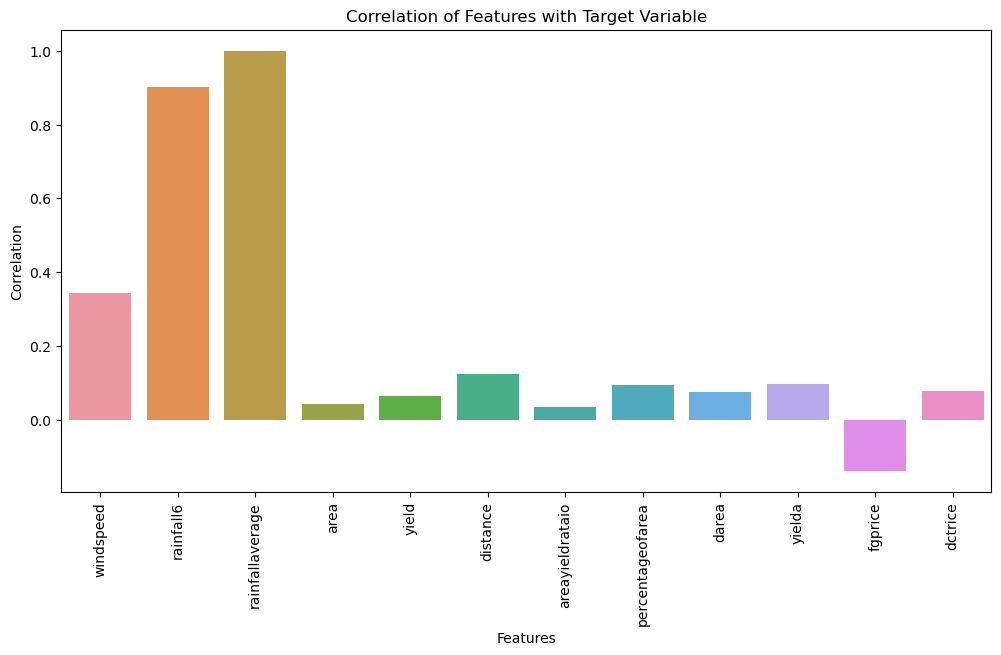

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation = df.corr()['rainfall24'].drop('rainfall24')

# Display the correlations
print(correlation)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.barplot(correlation.index, correlation.values)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [4]:
# Split the dataset into features and target variable
X = df.drop(['percentageofarea','area','areayieldrataio','yield','rainfallaverage','fgprice','distance'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','dctrice','windspeed','rainfall24','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','rainfall6'], axis=1)

In [5]:
X

,windspeed,rainfall24,rainfall6,darea,yielda,dctrice
0,0.000000,1.535972,3.032222,709.091324,0.832626,1.113550e+07
1,0.000000,2.141071,3.942857,120.014173,1.065706,2.412279e+06
2,7.116629,5.809375,20.589580,416.543187,1.383386,1.086828e+07
3,67.089467,3.908854,11.341670,3274.800267,2.640510,1.630911e+08
4,0.000000,0.805469,1.580208,614.521934,0.540153,6.260539e+06
...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,186.598393,0.643724,2.265505e+06
39740,0.000000,0.030208,0.062500,582.100434,1.708459,1.875686e+07
39741,8.575491,2.652500,5.460000,121.564092,0.729707,1.673060e+06
39742,9.387123,1.696181,3.348611,15.323183,0.298725,8.633316e+04


In [6]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [7]:
# Remove the rows with zero values from the training set and testing set
mask =X['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [8]:
X.shape, y.shape

((15401, 6), (15401, 1))

In [9]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:

X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [11]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distance  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   darea       12320 non-null  float64
 4   yielda      12320 non-null  float64
 5   dctrice     12320 non-null  float64
dtypes: float64(6)
memory usage: 673.8 KB


In [12]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [13]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [14]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [15]:
X_train.shape,y_train.shape

((12320, 6), (12320, 1))

In [16]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [17]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [18]:
X_val.shape

(1540, 6)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_leaf_nodes=100,
    random_state=42,
   
)

model.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15648\3599840134.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, max_leaf_nodes=100, min_samples_leaf=2,
                      random_state=42)

In [20]:

from sklearn.metrics import explained_variance_score


predictions = model.predict(X_test)

# Evaluate the model
r2 = model.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = model.predict(X_val)

# Evaluate the model


r2 = model.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.7984647634213382
Mean Absolute Error (Test): 51.20600429418763

R-squared (Validation): 0.7936549515002389
Mean Absolute Error (Validation): 49.71047641018206

Explained Variance (Test): 0.7984672290797714
Explained Variance (Validation): 0.7939312430944431

Mean Absolute Error (Test, p.p.): 20.574782766699172%
Mean Absolute Error (Validation, p.p.): 20.502114305676745%


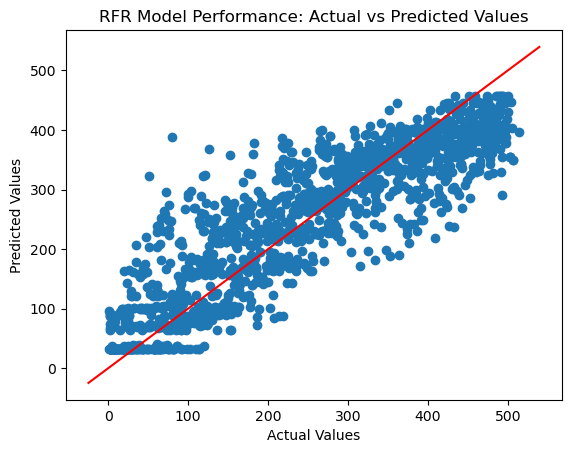

In [21]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Model Performance: Actual vs Predicted Values')


# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

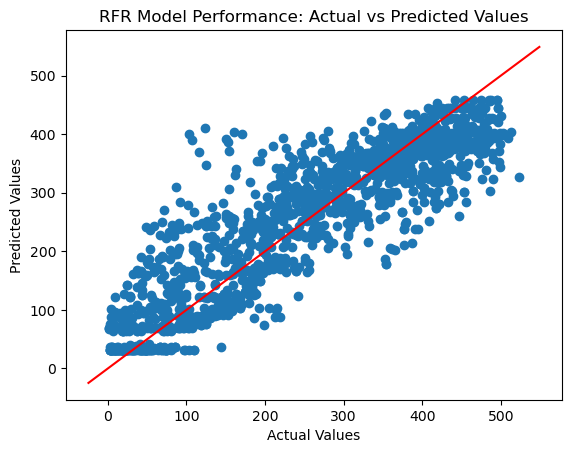

In [22]:
import matplotlib.pyplot as plt

# Make predictions
predictionsVal = model.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Model Performance: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [23]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

       Actual Predicted
0   247.66520    279.68
1   150.03570    263.33
2   204.25350    223.60
3   243.68320    235.43
4   313.06640    375.03
5    45.12484     99.24
6    46.88490     69.31
7   135.13260    173.16
8   429.67570    300.21
9   270.65440    355.58
10  500.44030    457.66
11  201.32620    260.66
12  229.84970    240.81
13  465.35340    402.10
14  168.38950    251.99
15  202.17260    184.45
16  134.15500    103.32
17  424.57490    399.29
18  385.14540    369.04
19  103.52130     87.97


In [24]:
from sklearn.pipeline import make_pipeline
from joblib import dump

pipeline = make_pipeline(model)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'RFR-DISTANCE.joblib')

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


['RFR-DISTANCE.joblib']

In [25]:
# r2 = pipeline.score(X_test, y_test)
# print(f'R-squared (Test): {r2}')